In [1]:
import os
import pandas as pd
path_to_dataset = '/Users/sreyakaruturi/Downloads/FOREST_FIRE_SMOKE_AND_NON_FIRE_DATASET/train'
class_counts = {}
for class_name in os.listdir(path_to_dataset):
    class_path = os.path.join(path_to_dataset, class_name)
    num_images = len(os.listdir(class_path))
    class_counts[class_name] = num_images
df_class_counts = pd.DataFrame(list(class_counts.items()), columns=['Class', 'Number of Images'])
print(df_class_counts)


      Class  Number of Images
0     Smoke             10800
1  non fire             10800
2      fire             10800


In [2]:
path_to_dataset = '/Users/sreyakaruturi/Downloads/FOREST_FIRE_SMOKE_AND_NON_FIRE_DATASET/test'
class_counts = {}
for class_name in os.listdir(path_to_dataset):
    class_path = os.path.join(path_to_dataset, class_name)
    num_images = len(os.listdir(class_path))
    class_counts[class_name] = num_images
df_class_counts = pd.DataFrame(list(class_counts.items()), columns=['Class', 'Number of Images'])
print(df_class_counts)


      Class  Number of Images
0     Smoke              3500
1  non fire              3500
2      fire              3500


      Class  Number of Images
0     Smoke             10800
1  non fire             10800
2      fire             10800


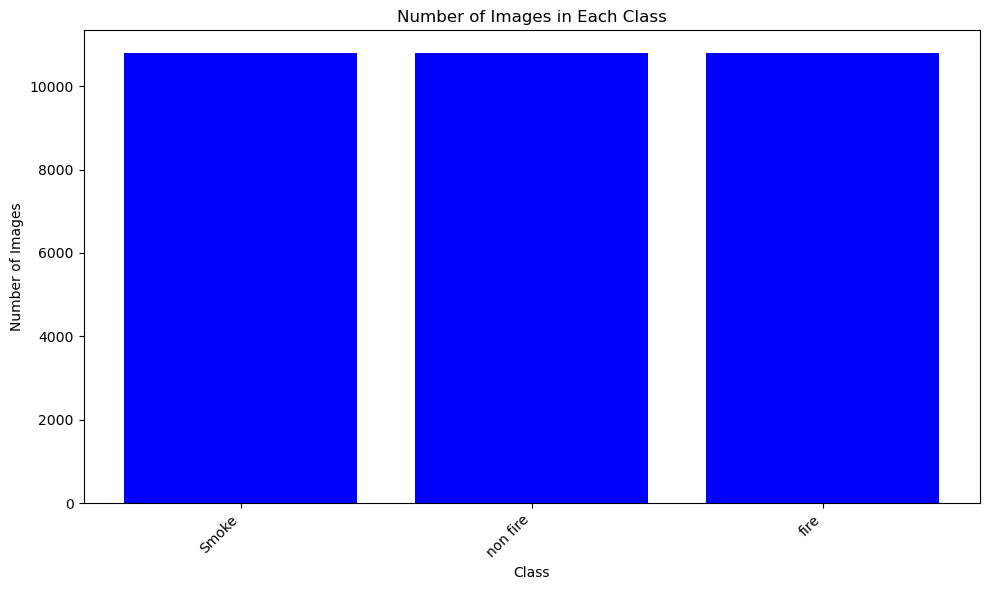

In [3]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# Replace 'path_to_dataset' with the actual path to your dataset
path_to_dataset = '/Users/sreyakaruturi/Downloads/FOREST_FIRE_SMOKE_AND_NON_FIRE_DATASET/train'

# Create a dictionary to store the count for each class
class_counts = {}

# Iterate through each class directory
for class_name in os.listdir(path_to_dataset):
    class_path = os.path.join(path_to_dataset, class_name)
    
    # Count the number of files (images) in each class
    num_images = len(os.listdir(class_path))
    
    # Store the count in the dictionary
    class_counts[class_name] = num_images

# Convert the dictionary to a pandas DataFrame for better visualization
df_class_counts = pd.DataFrame(list(class_counts.items()), columns=['Class', 'Number of Images'])

# Print or display the DataFrame
print(df_class_counts)

# Plot the bar chart
plt.figure(figsize=(10, 6))
plt.bar(df_class_counts['Class'], df_class_counts['Number of Images'], color='blue')
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.title('Number of Images in Each Class')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.tight_layout()
plt.show()

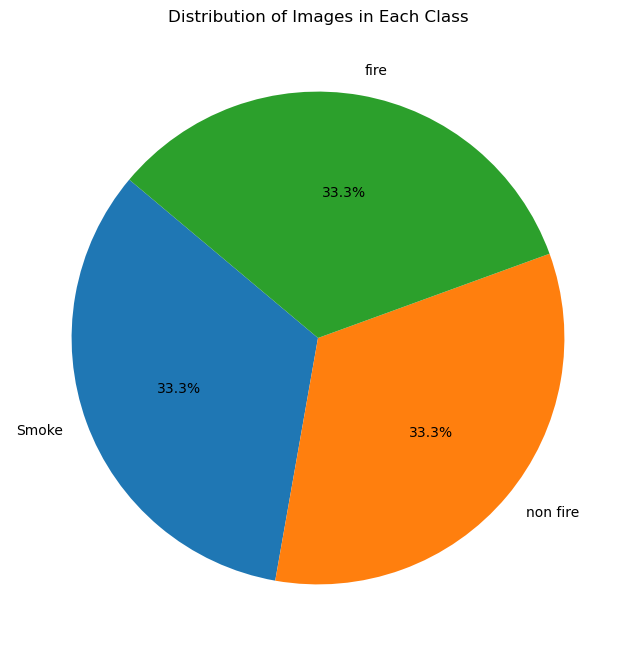

In [4]:
plt.figure(figsize=(8, 8))
plt.pie(df_class_counts['Number of Images'], labels=df_class_counts['Class'], autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Images in Each Class')
plt.show()


In [5]:
train_dir = "/Users/sreyakaruturi/Downloads/FOREST_FIRE_SMOKE_AND_NON_FIRE_DATASET/train"
test_dir = "/Users/sreyakaruturi/Downloads/FOREST_FIRE_SMOKE_AND_NON_FIRE_DATASET/test"

In [6]:
import os
import random
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models, callbacks
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [7]:
# Set random seed for reproducibility
seed = 42
random.seed(seed)
np.random.seed(seed)
tf.random.set_seed(seed)

In [8]:
def load_images(directory, target_size=(128, 128), batch_size=512):
    images = []
    labels = []
    label_encoder = LabelEncoder()

    for label in os.listdir(directory):
        label_path = os.path.join(directory, label)
        if os.path.isdir(label_path):
            for image_file in os.listdir(label_path):
                image_path = os.path.join(label_path, image_file)
                img = tf.keras.preprocessing.image.load_img(image_path, target_size=target_size)
                img = tf.keras.preprocessing.image.img_to_array(img)
                img = tf.keras.applications.vgg16.preprocess_input(img)
                images.append(img)
                labels.append(label)

    labels = label_encoder.fit_transform(labels)

    return np.array(images), np.array(labels)

In [ ]:
import os
import random
from PIL import Image
image_directory = "/Users/sreyakaruturi/Downloads/FOREST_FIRE_SMOKE_AND_NON_FIRE_DATASET/test"
image_files = [f for f in os.listdir(image_directory) if f.endswith(('.png', '.jpg', '.jpeg'))]
if not image_files:
    print("No images found in the specified directory.")
else:
    random_image_file = random.choice(image_files)
    random_image_path = os.path.join(image_directory, random_image_file)
    image = Image.open(random_image_path)
    print("Random Image Path:", random_image_path)
    print("Image Size:", image.size)
    image.show()


In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
)

train_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=512,
    class_mode='sparse'
)

test_generator = datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=512,
    class_mode='sparse'
)

Found 32398 images belonging to 3 classes.
Found 10500 images belonging to 3 classes.


In [13]:
X_train, y_train = load_images(train_dir)
X_test, y_test = load_images(test_dir)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=seed)

In [14]:
input_shape = X_train[0].shape
base_model = tf.keras.applications.VGG16(weights='imagenet', include_top=False, input_shape=input_shape)
base_model.trainable = False
transfer_model = models.Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(4096, activation='relu'),
    layers.Dense(4096, activation='relu'),
    layers.Dense(3, activation='softmax')
])
transfer_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
early_stopping = callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
history_transfer_learning = transfer_model.fit(
    X_train, y_train,
    epochs=20,
    validation_data=(X_val, y_val),
    callbacks=[early_stopping]  
)
loss, accuracy = transfer_model.evaluate(X_test, y_test)
print(f"Transfer Learning Model Accuracy: {accuracy}")

58889256/58889256 [==============================] - 18s 0us/step
Epoch 1/20
810/810 [==============================] - 770s 949ms/step - loss: 0.7429 - accuracy: 0.9580 - val_loss: 0.1627 - val_accuracy: 0.9719
Epoch 2/20
810/810 [==============================] - 744s 919ms/step - loss: 0.1978 - accuracy: 0.9724 - val_loss: 0.1675 - val_accuracy: 0.9759
Epoch 3/20
810/810 [==============================] - 726s 896ms/step - loss: 0.2481 - accuracy: 0.9784 - val_loss: 0.1989 - val_accuracy: 0.9795
Epoch 4/20
329/329 [==============================] - 228s 692ms/step - loss: 0.1297 - accuracy: 0.9757
Transfer Learning Model Accuracy: 0.9757142663002014


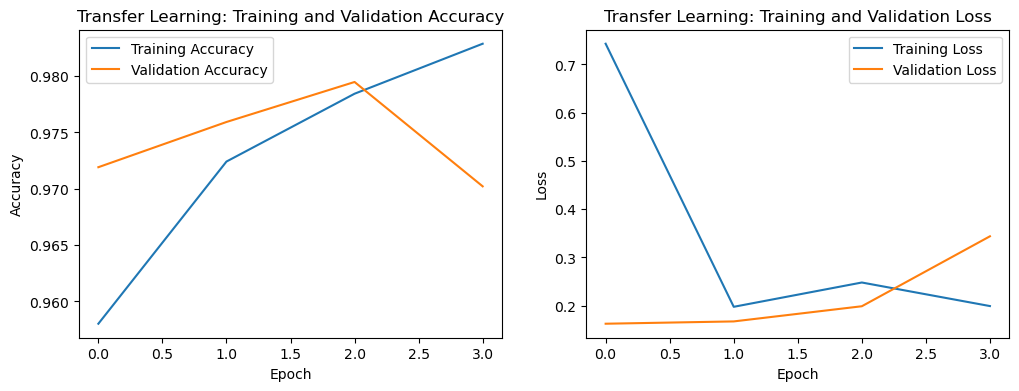

In [16]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history_transfer_learning.history['accuracy'], label='Training Accuracy')
plt.plot(history_transfer_learning.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Transfer Learning: Training and Validation Accuracy')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(history_transfer_learning.history['loss'], label='Training Loss')
plt.plot(history_transfer_learning.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Transfer Learning: Training and Validation Loss')
plt.legend()

plt.show()

In [18]:
predictions = transfer_model.predict(X_test)
predicted_labels = np.argmax(predictions, axis=1)
print("Predicted Labels:", predicted_labels)
accuracy = np.sum(predicted_labels == y_test) / len(y_test)
print("Accuracy on Test Set:", accuracy)

329/329 [==============================] - 228s 691ms/step
Predicted Labels: [1 0 0 ... 1 1 1]
Accuracy on Test Set: 0.9757142857142858
